In [1]:
for i in range(0, 52, 1):
    filename = (str(i) + ".inp")
    target = open(filename, 'w+')
    pos = 0.5 * i * (1 / 50)
    target.write("""include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_structure.inp
""")
    target.write(f"centre 0.5 0.25 0.25")
    target.write("""
size 12 16
vacancy 0.5 0.5 0.0
vacancy 0.5 0.0 0.5
""")
    target.write(f"intersitial Na 0.5 {pos:.16f} {0.5 - pos:.16f} fix")
    target.write("""
include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_lucy2_potentials.inp    
""")

In [2]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout=None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 52/52 [06:30<00:00,  7.51s/it]


In [3]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

energy = energyList('*.out')
energies = []

for i in range(0, 51):
        try:
            energies.append(energy[f'{i}.out'])
        except:
            pass
    
print(energies)

[2.43690202, 2.42988969, 2.42834081, 2.43383396, 2.44064024, 2.45385289, 2.47120677, 2.49511608, 2.51607111, 2.54597137, 2.57389812, 2.60231866, 2.63048329, 2.65787088, 2.68379846, 2.70816411, 2.73058405, 2.75088314, 2.7688366, 2.78446223, 2.79768057, 2.80506882, 2.8168837, 2.82287323, 2.82646793, 2.82766456, 2.82646793, 2.82287323, 2.8168837, 2.80506882, 2.79768057, 2.78446223, 2.7688366, 2.75088314, 2.73058405, 2.70816411, 2.68379846, 2.65787088, 2.63048329, 2.60231866, 2.57389812, 2.54597137, 2.51607111, 2.49511608, 2.47120677, 2.45385289, 2.44064024, 2.43383396, 2.42834081, 2.42988969, 2.43690202]


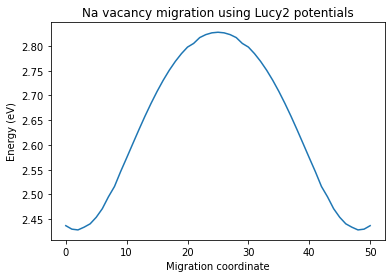

In [5]:
import matplotlib.pyplot as plt

x = list(range(0,51))
y = []


for i in range(0, 51):
    try:
        y.append(energy[f'{i}.out'])
    except:
        pass
    
plt.plot(x, y)
plt.xlabel('Migration coordinate')
plt.ylabel('Energy (eV)')
plt.title('Na vacancy migration using Lucy2 potentials')
plt.savefig('lucy2_migration.jpg', bbox_inches='tight', dpi=500)